In [93]:
import numpy as np
import pandas as pd
import os
import glob
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [94]:
import matplotlib.pyplot as plt
import numpy as np

from lmfit.models import LorentzianModel, GaussianModel, SplineModel, VoigtModel

In [95]:
#loading 6 peaks
folder_path = 'spectroscopy_data/peaks_6'
csv_files = glob.glob(os.path.join(folder_path, '*.CSV')) 
dataframes6peaks = []
i=0
for file in csv_files:
    i +=1
    df = pd.read_csv(file)
    dataframes6peaks.append(df)
    print(f"{i} Loaded {file}:")  # Display first few rows of each file


1 Loaded spectroscopy_data/peaks_6\6_ (1).CSV:
2 Loaded spectroscopy_data/peaks_6\6_ (10).CSV:
3 Loaded spectroscopy_data/peaks_6\6_ (2).CSV:
4 Loaded spectroscopy_data/peaks_6\6_ (3).CSV:
5 Loaded spectroscopy_data/peaks_6\6_ (4).CSV:
6 Loaded spectroscopy_data/peaks_6\6_ (5).CSV:
7 Loaded spectroscopy_data/peaks_6\6_ (6).CSV:
8 Loaded spectroscopy_data/peaks_6\6_ (7).CSV:
9 Loaded spectroscopy_data/peaks_6\6_ (8).CSV:
10 Loaded spectroscopy_data/peaks_6\6_ (9).CSV:
11 Loaded spectroscopy_data/peaks_6\CS-BB-22.CSV:
12 Loaded spectroscopy_data/peaks_6\CS-BB-23.CSV:


In [96]:
y = dataframes6peaks[4]['CH1[V]'] * 100
x = dataframes6peaks[4]['[s]'] * 1000

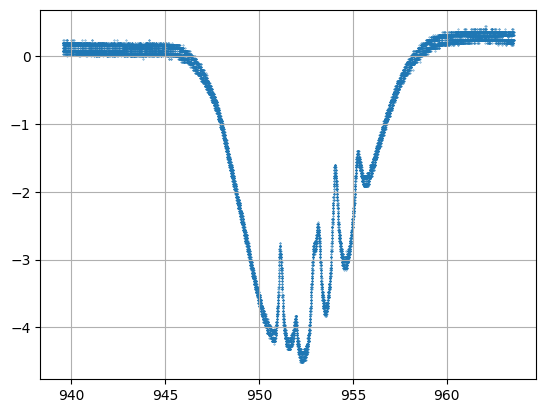

In [97]:
plt.scatter(x,y, s=0.1)
# plt.ylim(0,0.5)
# plt.xlim(960, 961)
plt.grid()

In [98]:
#function for moving average over 10 pts on the second axis

def move_ave(arr, window_size=10):
    window_size = 10

    numbers_series = pd.Series(arr)
    
    # Get the window of series
    # of observations of specified window size
    windows = numbers_series.rolling(window_size)
    
    # Create a series of moving
    # averages of each window
    moving_averages = windows.mean()
    
    # Convert pandas series back to list
    moving_averages_list = moving_averages.tolist()
    
    # Remove null entries from the list
    final_list = moving_averages_list[window_size - 1:]
    return final_list


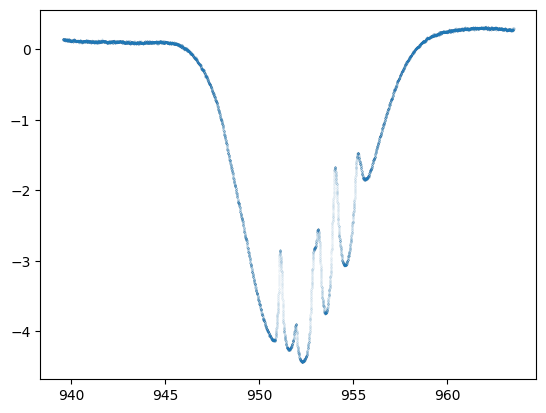

In [99]:
#getting&plotting moving averaged data
x_aveg = np.array(move_ave(x))
y_aveg = np.array(move_ave(y))
plt.scatter(x_aveg, y_aveg, s=0.001)

In [100]:
#defining knot making function
def get_knots(npoints = 10 , dataset=None, x=None, y=None, plotting = False):
    '''
        gets the knots positions at local minima in constants steps
        if plotting True : returns tuple xknots, yknots
    '''
    if dataset != None:
        x = dataset['[s]']
        y = dataset['CH1[V]']
    step = int(len(x)/npoints)
    knots = np.zeros(npoints, dtype=int)
    cutleft = 0
    cutright = step
    for n in range(npoints):
        localmin = y[cutleft:cutright].argmin()
        index_localmin = int(cutleft + localmin)
        knots[n] = index_localmin
        cutleft += step
        cutright += step
    if plotting:
        print('the knots are at second indices:', knots)
        print('the knots are at yvals:', y[knots])
        return (knots, y[knots])
    else:
        print('the knots are at seconds indices:', knots)
        return knots


In [101]:
#getting knots
xknots_indices, yknots = get_knots(x=x_aveg, y=y_aveg,  npoints = 20, plotting=True)

the knots are at second indices: [  723  1261  2984  3396  4692  5978  6989  7991  8990  9982 10608 11642
 12462 13404 13986 14994 16003 17044 17991 19674]
the knots are at yvals: [ 0.096  0.092  0.076  0.072  0.072 -0.2   -0.976 -2.476 -3.924 -4.244
 -4.44  -3.748 -3.068 -1.856 -1.328 -0.36   0.1    0.236  0.276  0.256]


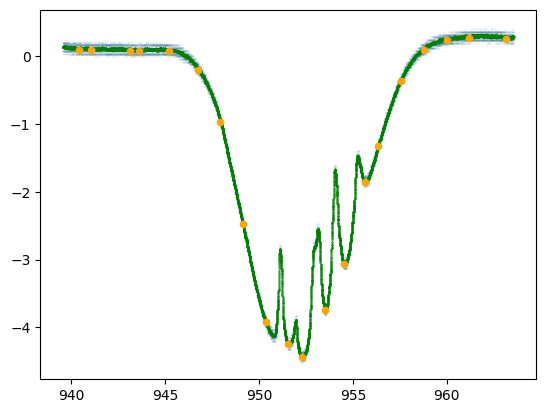

In [102]:
#plotting knots
plt.scatter(x,y, s=0.1, alpha=0.05)
plt.scatter(x_aveg,y_aveg, s=0.1, color= 'green')
plt.scatter(x_aveg[xknots_indices], yknots, s=20, color ='orange')

In [103]:
# #gauss model for bk
# gauss = GaussianModel(prefix='gauss_')
# params = gauss.guess(y_aveg, x_aveg)

In [104]:
#spline model
bkg = SplineModel(prefix='bkg_', xknots=x_aveg[xknots_indices])
params = bkg.guess(y_aveg  , x_aveg)
params

name,value,initial value,min,max,vary
bkg_s0,0.09733333,None,-inf,inf,True
bkg_s1,0.09266667,None,-inf,inf,True
bkg_s2,0.07666667,None,-inf,inf,True
bkg_s3,0.07266667,None,-inf,inf,True
bkg_s4,0.07266667,None,-inf,inf,True
bkg_s5,-0.19933333,None,-inf,inf,True
bkg_s6,-0.97466667,None,-inf,inf,True
bkg_s7,-2.47600000,None,-inf,inf,True
bkg_s8,-3.92333333,None,-inf,inf,True
bkg_s9,-4.24333333,None,-inf,inf,True


In [105]:
for key in params.keys():
    print(params[key])
    params[key].min = params[key].value - 0.2
    params[key].max = params[key].value + 0.2
params

<Parameter 'bkg_s0', value=0.09733333333333333, bounds=[-inf:inf]>
<Parameter 'bkg_s1', value=0.09266666666666666, bounds=[-inf:inf]>
<Parameter 'bkg_s2', value=0.07666666666666667, bounds=[-inf:inf]>
<Parameter 'bkg_s3', value=0.07266666666666667, bounds=[-inf:inf]>
<Parameter 'bkg_s4', value=0.07266666666666667, bounds=[-inf:inf]>
<Parameter 'bkg_s5', value=-0.19933333333333333, bounds=[-inf:inf]>
<Parameter 'bkg_s6', value=-0.9746666666666667, bounds=[-inf:inf]>
<Parameter 'bkg_s7', value=-2.476, bounds=[-inf:inf]>
<Parameter 'bkg_s8', value=-3.9233333333333333, bounds=[-inf:inf]>
<Parameter 'bkg_s9', value=-4.243333333333333, bounds=[-inf:inf]>
<Parameter 'bkg_s10', value=-4.439333333333334, bounds=[-inf:inf]>
<Parameter 'bkg_s11', value=-3.7473333333333336, bounds=[-inf:inf]>
<Parameter 'bkg_s12', value=-3.0660000000000003, bounds=[-inf:inf]>
<Parameter 'bkg_s13', value=-1.8553333333333335, bounds=[-inf:inf]>
<Parameter 'bkg_s14', value=-1.3273333333333335, bounds=[-inf:inf]>
<Par

name,value,initial value,min,max,vary
bkg_s0,0.09733333,None,-0.10266667,0.29733333,True
bkg_s1,0.09266667,None,-0.10733333,0.29266667,True
bkg_s2,0.07666667,None,-0.12333333,0.27666667,True
bkg_s3,0.07266667,None,-0.12733333,0.27266667,True
bkg_s4,0.07266667,None,-0.12733333,0.27266667,True
bkg_s5,-0.19933333,None,-0.39933333,6.6667e-04,True
bkg_s6,-0.97466667,None,-1.17466667,-0.77466667,True
bkg_s7,-2.47600000,None,-2.67600000,-2.27600000,True
bkg_s8,-3.92333333,None,-4.12333333,-3.72333333,True
bkg_s9,-4.24333333,None,-4.44333333,-4.04333333,True


In [106]:
#peaks
# peak1 = LorentzianModel(prefix='l1_')
# params.update(peak1.make_params(center=dict(value=947.2, min=947, max=947.5),
#                                sigma=dict(value=0.1, min=0),
#                                amplitude=dict(value=1, min=0)))
# peak2 = LorentzianModel(prefix='l2_')
# params.update(peak2.make_params(center=dict(value=948, min=947.5, max=948.5),
#                                sigma=dict(value=0.1, min=0),
#                                amplitude=dict(value=1, min=0)))
# peak3 = LorentzianModel(prefix='l3_')
# params.update(peak3.make_params(center=dict(value=949, min=948.5, max=949.6),
#                                sigma=dict(value=0.1, min=0),
#                                amplitude=dict(value=1, min=0)))
# peak4 = LorentzianModel(prefix='l4_')
# params.update(peak4.make_params(center=dict(value=950.1, min=949.5, max=950.6),
#                                sigma=dict(value=0.1, min=0),
#                                amplitude=dict(value=1, min=0)))

In [107]:
# model =   bkg + peak1 +peak2 + peak3 
model =   bkg
# model = gauss

init = model.eval(params, x=x_aveg) #for evaling initial guess
out = model.fit(y_aveg, params, x=x_aveg) 
print(out.fit_report(min_correl=0.3))

[[Model]]
    Model(spline_model, prefix='bkg_')
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 22
    # data points      = 19991
    # variables        = 20
    chi-square         = 1722.25406
    reduced chi-square = 0.08623775
    Akaike info crit   = -48970.8999
    Bayesian info crit = -48812.8392
    R-squared          = 0.96362600
##  Warning: uncertainties could not be estimated:
    bkg_s0:   at initial value
    bkg_s1:   at initial value
    bkg_s2:   at initial value
    bkg_s3:   at initial value
    bkg_s4:   at initial value
    bkg_s5:   at initial value
    bkg_s6:   at initial value
    bkg_s7:   at initial value
    bkg_s8:   at initial value
    bkg_s9:   at initial value
    bkg_s10:  at initial value
    bkg_s11:  at initial value
    bkg_s12:  at initial value
    bkg_s13:  at initial value
    bkg_s14:  at initial value
    bkg_s15:  at initial value
    bkg_s16:  at initial value
    bkg_s17:  at initial value
    bkg_s18:  at init

In [108]:
knot_yvals = np.array([o.value for o in out.params.values() if o.name.startswith('bkg')])

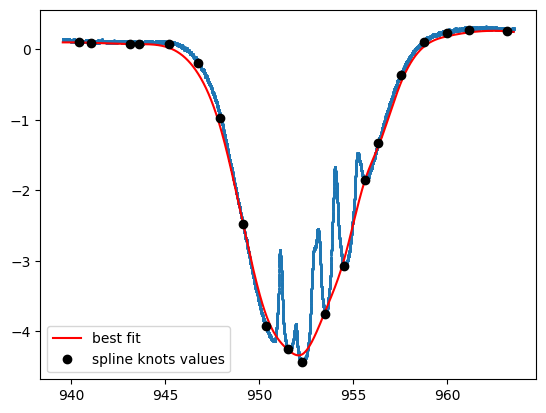

In [109]:
#get the component vals
comps = out.eval_components()

#og data
plt.scatter(x_aveg, y_aveg, s=1)
#best fit
plt.plot(x_aveg, out.best_fit, label='best fit', color= 'red')
#background
# plt.plot(x_aveg, comps['bkg_'], label='background')
#gauss
# plt.plot(x_aveg, comps['gauss_'], label = 'gauss')
#splines
plt.plot(x_aveg[xknots_indices], knot_yvals, 'o', color='black', label='spline knots values')


# plt.plot(x, comps['l1_'], label='peak')
# plt.plot(x, comps['l2_'], label='peak')
# plt.plot(x, comps['l3_'], label='peak')
# plt.plot(x, comps['l4_'], label='peak')

plt.legend()



### eval peaks

In [118]:
ynew = y_aveg - comps['bkg_']
ynew *= 100

(950.0, 957.0)

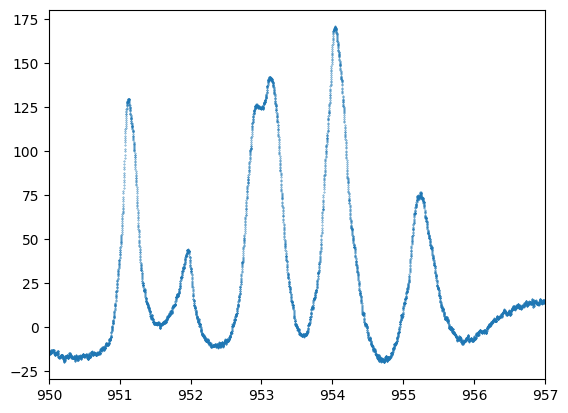

In [124]:
# plt.scatter(x,y,s=0.1)
# plt.plot(x, comps['bkg_'], label='background')
plt.scatter(x_aveg, ynew, s = 0.1)
plt.xlim(950, 957)


In [112]:
# l1 = LorentzianModel(prefix='l1_')

# params = l1.make_params(
#     center = dict(value = 947), 
#     sigma = 0.4,
#     amplitude = 120
# )

# # l2 = LorentzianModel(prefix='l2_')

In [113]:
# model  = l1

# init = model.eval(params, x=x)
# out = model.fit(ynew, params, x=x)
# print(out.fit_report(min_correl=0.3))


In [114]:

# comps = out.eval_components()
# plt.plot(x, out.best_fit, label='best fit', color= 'red')
# # plt.plot(x, comps['l1_'], label='background')
# plt.scatter(x,ynew,s=1)